<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/deep-learning-projects-/blob/main/LSTM_Conv1D_GRU_tempreture_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#first to mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import tensorflow as tf
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/forecaste_datasets/jena_climate_2009_2016.csv")
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420447,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420448,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420449,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [68]:
df = df[5::6] #only take from 5 and increase by 6 and so on
df #now df contain information about one clock not every 10 minuts

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420425,31.12.2016 19:50:00,1001.55,-1.65,271.39,-6.55,69.05,5.41,3.74,1.67,2.32,3.73,1283.24,0.73,1.20,212.0
420431,31.12.2016 20:50:00,1001.33,-3.46,269.59,-7.13,75.60,4.73,3.57,1.15,2.22,3.57,1291.65,0.81,1.16,201.4
420437,31.12.2016 21:50:00,1000.81,-2.48,270.62,-6.95,71.20,5.09,3.62,1.47,2.25,3.62,1286.24,0.24,0.52,9.4
420443,31.12.2016 22:50:00,1000.32,-4.09,269.05,-7.23,78.60,4.51,3.54,0.96,2.21,3.54,1293.37,1.25,1.60,199.2


In [69]:
df.index = pd.to_datetime(df['Date Time'],format = '%d.%m.%Y %H:%M:%S')
df[:25]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


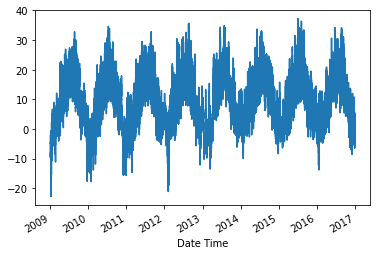

In [70]:
temp = df['T (degC)']
temp.plot()

In [6]:
from sklearn.preprocessing import StandardScaler
def df_to_X_y(df,window_size):
  df_as_np = df.to_numpy()
  #scaler = StandardScaler()
  #df_as_np = scaler.fit_transform((df_as_np.reshape(1,-1).T))
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    y.append(df_as_np[i+window_size])
  return np.array(X) , np.array(y)

In [7]:
WIDOW_SIZE = 5
X,y = df_to_X_y(temp,WIDOW_SIZE)
X = X.reshape(X.shape[0],X.shape[1],X.shape[2])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.111)

In [9]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint #to save checkpoints
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [11]:
from keras.models import load_model
model1 = load_model('/content/drive/MyDrive/Colab Notebooks/forecaste_datasets/model1.h5',compile = False)

In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
def prediction_plot(model,X , y , start = 0 , end = 100):
  prediction = model.predict(X).flatten()
  df = pd.DataFrame()
  df['prediction'] =  prediction
  df['actual'] = y
  plt.plot(df['actual'][start:end],label='Actual mse')
  plt.plot(df['prediction'][start:end],label = 'Predicted mse')
  plt.title('Actual vs Prediction MSE')
  plt.legend()
  MSE = mse(y,prediction)
  print("MSE = ",MSE)
  return df ,MSE


0.5940299331690716

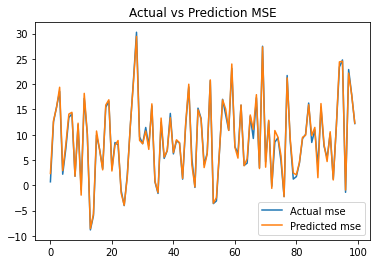

In [29]:
prediction_plot(model1,X_test , y_test)[1]

#CNN 1D model

In [43]:
model2 = Sequential()
model2.add(InputLayer((5,1)))
model2.add(Conv1D(64,kernel_size = 2))
model2.add(Flatten())
model2.add(Dense(8,'relu'))
model2.add(Dense(1,'linear'))
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 8)                 2056      
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [44]:
cp2 = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/forecaste_datasets/model2/',save_best_only= True) #make check point
model2.compile(loss = MeanSquaredError() , optimizer = Adam(learning_rate=0.0001),metrics = [MeanSquaredError()])

In [45]:
history = model2.fit(X_train,y_train , validation_data = (X_val , y_val),epochs = 10 ,callbacks= [cp2])

Epoch 1/10
1752/1752 [==============================] - 5s 2ms/step - loss: 15.3742 - mean_squared_error: 15.3740 - val_loss: 2.8049 - val_mean_squared_error: 2.8058
Epoch 2/10
1752/1752 [==============================] - 4s 2ms/step - loss: 1.5811 - mean_squared_error: 1.5811 - val_loss: 1.0024 - val_mean_squared_error: 1.0026
Epoch 3/10
1752/1752 [==============================] - 4s 2ms/step - loss: 0.8548 - mean_squared_error: 0.8548 - val_loss: 0.7728 - val_mean_squared_error: 0.7729
Epoch 4/10
1752/1752 [==============================] - 4s 2ms/step - loss: 0.7054 - mean_squared_error: 0.7053 - val_loss: 0.6794 - val_mean_squared_error: 0.6793
Epoch 5/10
1752/1752 [==============================] - 4s 2ms/step - loss: 0.6661 - mean_squared_error: 0.6661 - val_loss: 0.6640 - val_mean_squared_error: 0.6639
Epoch 6/10
1752/1752 [==============================] - 7s 4ms/step - loss: 0.6578 - mean_squared_error: 0.6578 - val_loss: 0.6603 - val_mean_squared_error: 0.6603
Epoch 7/10
175

MSE =  0.6260489337386593


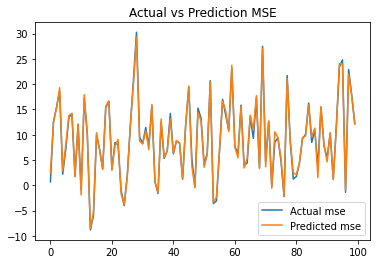

In [46]:
l = prediction_plot(model2,X_test , y_test)[1]

we noted that LSTM and Conv1D mse are almost the same but cnn model is less complex than LSTM model

In [47]:
model2.save("/content/drive/MyDrive/Colab Notebooks/forecaste_datasets/model2.h5")

#GRU model

In [48]:
model3 = Sequential()
model3.add(InputLayer((5,1)))
model3.add(GRU(64))
model3.add(Dense(8,'relu'))
model3.add(Dense(1,'linear'))
model3.summary()
#between lstm and cnn in complexity

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                12864     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [49]:
cp3 = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/forecaste_datasets/model3/',save_best_only= True) #make check point
model3.compile(loss = MeanSquaredError() , optimizer = Adam(learning_rate=0.0001),metrics = [MeanSquaredError()])

In [50]:
history = model3.fit(X_train,y_train , validation_data = (X_val , y_val),epochs = 10 ,callbacks= [cp3])

Epoch 1/10
1746/1752 [============================>.] - ETA: 0s - loss: 45.0615 - mean_squared_error: 45.0615

1752/1752 [==============================] - 14s 7ms/step - loss: 44.9349 - mean_squared_error: 44.9342 - val_loss: 6.1429 - val_mean_squared_error: 6.1402
Epoch 2/10
1746/1752 [============================>.] - ETA: 0s - loss: 2.8961 - mean_squared_error: 2.8961

1752/1752 [==============================] - 12s 7ms/step - loss: 2.8913 - mean_squared_error: 2.8913 - val_loss: 1.4097 - val_mean_squared_error: 1.4091
Epoch 3/10
1748/1752 [============================>.] - ETA: 0s - loss: 1.0616 - mean_squared_error: 1.0616

1752/1752 [==============================] - 12s 7ms/step - loss: 1.0605 - mean_squared_error: 1.0605 - val_loss: 0.8568 - val_mean_squared_error: 0.8566
Epoch 4/10
1744/1752 [============================>.] - ETA: 0s - loss: 0.7585 - mean_squared_error: 0.7585

1752/1752 [==============================] - 12s 7ms/step - loss: 0.7579 - mean_squared_error: 0.7579 - val_loss: 0.7099 - val_mean_squared_error: 0.7098
Epoch 5/10
1750/1752 [============================>.] - ETA: 0s - loss: 0.6814 - mean_squared_error: 0.6814

1752/1752 [==============================] - 12s 7ms/step - loss: 0.6814 - mean_squared_error: 0.6814 - val_loss: 0.6732 - val_mean_squared_error: 0.6732
Epoch 6/10
1750/1752 [============================>.] - ETA: 0s - loss: 0.6571 - mean_squared_error: 0.6571

1752/1752 [==============================] - 12s 7ms/step - loss: 0.6569 - mean_squared_error: 0.6569 - val_loss: 0.6603 - val_mean_squared_error: 0.6602
Epoch 7/10
1748/1752 [============================>.] - ETA: 0s - loss: 0.6463 - mean_squared_error: 0.6463

1752/1752 [==============================] - 11s 6ms/step - loss: 0.6472 - mean_squared_error: 0.6472 - val_loss: 0.6550 - val_mean_squared_error: 0.6550
Epoch 8/10
1744/1752 [============================>.] - ETA: 0s - loss: 0.6425 - mean_squared_error: 0.6425

1752/1752 [==============================] - 12s 7ms/step - loss: 0.6422 - mean_squared_error: 0.6422 - val_loss: 0.6539 - val_mean_squared_error: 0.6538
Epoch 9/10
1752/1752 [==============================] - 8s 5ms/step - loss: 0.6401 - mean_squared_error: 0.6400 - val_loss: 0.6656 - val_mean_squared_error: 0.6655
Epoch 10/10
1747/1752 [============================>.] - ETA: 0s - loss: 0.6378 - mean_squared_error: 0.6378

1752/1752 [==============================] - 12s 7ms/step - loss: 0.6375 - mean_squared_error: 0.6375 - val_loss: 0.6471 - val_mean_squared_error: 0.6470


MSE =  0.5945315168972618


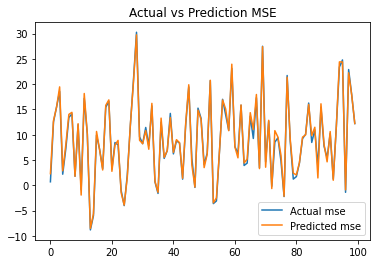

In [52]:
l = prediction_plot(model3,X_test , y_test)[1]

GRU in between CNN and LSTM in all things

In [51]:
model3.save("/content/drive/MyDrive/Colab Notebooks/forecaste_datasets/model3.h5")

#Multivariate Forecasting

In [71]:
temp = df['T (degC)']
temp_df = pd.DataFrame({"Tempreture":temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Tempreture,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:50:00,-1.65,1.483214e+09
2016-12-31 20:50:00,-3.46,1.483217e+09
2016-12-31 21:50:00,-2.48,1.483221e+09


In [72]:
day = 60*60*24
year = 365.2425 * day
temp_df['Day sin'] = np.sin(temp_df['Seconds'] *(2*np.pi/day) )
temp_df['Day cos'] = np.cos(temp_df['Seconds'] *(2*np.pi/day) )
temp_df['year sin'] = np.sin(temp_df['Seconds'] *(2*np.pi/year) )
temp_df['year cos'] = np.cos(temp_df['Seconds'] *(2*np.pi/year) )

temp_df.head(12)

,Tempreture,Seconds,Day sin,Day cos,year sin,year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,2.588190e-01,9.659258e-01,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,5.000000e-01,8.660254e-01,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,7.071068e-01,7.071068e-01,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,8.660254e-01,5.000000e-01,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,9.659258e-01,2.588190e-01,0.012916,0.999917
2009-01-01 06:00:00,-9.67,1.230790e+09,1.000000e+00,4.339955e-12,0.013633,0.999907
2009-01-01 07:00:00,-9.17,1.230793e+09,9.659258e-01,-2.588190e-01,0.014349,0.999897
2009-01-01 08:00:00,-8.10,1.230797e+09,8.660254e-01,-5.000000e-01,0.015066,0.999886
2009-01-01 09:00:00,-7.66,1.230800e+09,7.071068e-01,-7.071068e-01,0.015783,0.999875


In [73]:
temp_df = temp_df.drop('Seconds',axis = 1)

In [74]:
temp_df.head()

,Tempreture,Day sin,Day cos,year sin,year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [15]:
#[[[t1,ds1],[t2,ds2],[t3,ds3],[t4,ds4]]]                                  [t5]
#[[[t2,ds2],[t3,ds3],[t4,ds4],[t5,ds5]]]                                  [t6]
#[[[t3,ds3],[t4,ds4],[t5,ds5],[t6,ds6]]]                                  [t7]
# past values depend on which model will forecast                         output
#ds ====> day sin
#t =====> tempreture
def df_to_X_y2(df,window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    y.append(df_as_np[i+window_size][0])
  return np.array(X) , np.array(y)

In [16]:
X2,y2 = df_to_X_y2(temp_df,6)
X2.shape ,y2.shape

((70069, 6, 5), (70069,))

In [17]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size = 0.1)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2,y_train2,test_size = 0.111)

In [18]:
X_train2.shape , X_test2.shape ,X_val2.shape #80% train , 10% test , 10% validation


((56062, 6, 5), (7007, 6, 5), (7000, 6, 5))

In [19]:
temp_training_mean = np.mean(X_train2[:,:,0])
temp_training_std = np.std(X_train2[:,:,0])
def preprocess(X):
  X[:,:,0] = (X[:,:,0]-temp_training_mean)/temp_training_std
  return X

In [20]:
X_train2 = preprocess(X_train2)
X_test2 = preprocess(X_test2)
X_val2 = preprocess(X_val2)

In [21]:
model4 = Sequential()
model4.add(InputLayer((6,5)))
model4.add(LSTM(64))
model4.add(Dense(8,'relu'))
model4.add(Dense(1,'linear'))
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17920     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [23]:
cp4 = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/forecaste_datasets/model4/',save_best_only= True) #make check point
model4.compile(loss = MeanSquaredError() , optimizer = Adam(learning_rate=0.0001),metrics = [MeanSquaredError()])

In [24]:
history = model4.fit(X_train2,y_train2 , validation_data = (X_val2 , y_val2),epochs = 10 ,callbacks= [cp4])


Epoch 1/10
1751/1752 [============================>.] - ETA: 0s - loss: 34.8227 - mean_squared_error: 34.8227

1752/1752 [==============================] - 22s 11ms/step - loss: 34.8063 - mean_squared_error: 34.8052 - val_loss: 7.5331 - val_mean_squared_error: 7.5324
Epoch 2/10
1746/1752 [============================>.] - ETA: 0s - loss: 5.1393 - mean_squared_error: 5.1393

1752/1752 [==============================] - 19s 11ms/step - loss: 5.1368 - mean_squared_error: 5.1368 - val_loss: 3.1944 - val_mean_squared_error: 3.1940
Epoch 3/10
1751/1752 [============================>.] - ETA: 0s - loss: 2.2912 - mean_squared_error: 2.2912

1752/1752 [==============================] - 17s 10ms/step - loss: 2.2909 - mean_squared_error: 2.2908 - val_loss: 1.4761 - val_mean_squared_error: 1.4772
Epoch 4/10
1744/1752 [============================>.] - ETA: 0s - loss: 1.1067 - mean_squared_error: 1.1067

1752/1752 [==============================] - 16s 9ms/step - loss: 1.1056 - mean_squared_error: 1.1056 - val_loss: 0.8450 - val_mean_squared_error: 0.8464
Epoch 5/10
1749/1752 [============================>.] - ETA: 0s - loss: 0.7577 - mean_squared_error: 0.7577

1752/1752 [==============================] - 16s 9ms/step - loss: 0.7576 - mean_squared_error: 0.7576 - val_loss: 0.6491 - val_mean_squared_error: 0.6507
Epoch 6/10
1752/1752 [==============================] - ETA: 0s - loss: 0.6244 - mean_squared_error: 0.6244

1752/1752 [==============================] - 16s 9ms/step - loss: 0.6244 - mean_squared_error: 0.6244 - val_loss: 0.5583 - val_mean_squared_error: 0.5597
Epoch 7/10
1749/1752 [============================>.] - ETA: 0s - loss: 0.5580 - mean_squared_error: 0.5580

1752/1752 [==============================] - 17s 10ms/step - loss: 0.5577 - mean_squared_error: 0.5577 - val_loss: 0.5134 - val_mean_squared_error: 0.5148
Epoch 8/10
1752/1752 [==============================] - 13s 7ms/step - loss: 0.5303 - mean_squared_error: 0.5303 - val_loss: 0.5223 - val_mean_squared_error: 0.5238
Epoch 9/10
1746/1752 [============================>.] - ETA: 0s - loss: 0.5222 - mean_squared_error: 0.5222

1752/1752 [==============================] - 17s 10ms/step - loss: 0.5224 - mean_squared_error: 0.5224 - val_loss: 0.4932 - val_mean_squared_error: 0.4945
Epoch 10/10
1752/1752 [==============================] - 12s 7ms/step - loss: 0.5173 - mean_squared_error: 0.5173 - val_loss: 0.4942 - val_mean_squared_error: 0.4955


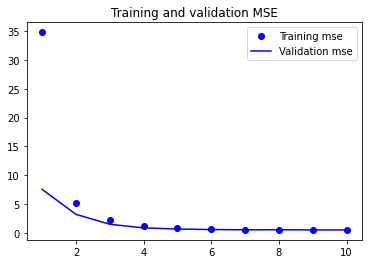

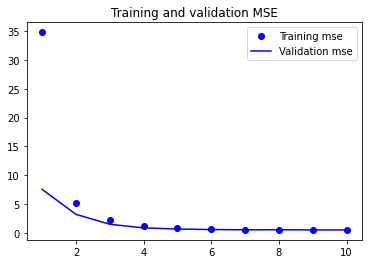

In [25]:
import matplotlib.pyplot as plt
acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training mse')
plt.plot(epochs, val_acc, 'b', label='Validation mse')
plt.title('Training and validation MSE')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training mse')
plt.plot(epochs, val_loss, 'b', label='Validation mse')
plt.title('Training and validation MSE')
plt.legend()
plt.show()

MSE =  0.5127380638695602


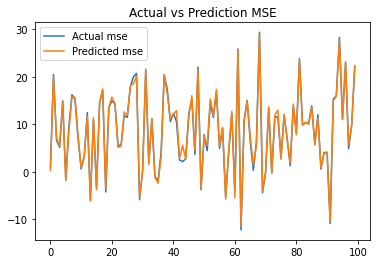

In [26]:
l = prediction_plot(model4,X_test2 , y_test2)[1]

In [27]:
model4.save("/content/drive/MyDrive/Colab Notebooks/forecaste_datasets/model4.h5")

# Model to predict pressure and tempreture 

In [75]:
temp_df['p(mbar)'] = df['p (mbar)']

In [76]:
temp_df.head()

,Tempreture,Day sin,Day cos,year sin,year cos,p(mbar)
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950,996.50
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942,996.62
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934,996.84
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926,996.99
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917,997.46


In [77]:
def df_to_X_y3(df,window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][5]]
    X.append(row)
    y.append(label)
  return np.array(X) , np.array(y)

In [160]:
X3 , y3 = df_to_X_y3(temp_df)
X3.shape , y3.shape

((70068, 7, 6), (70068, 2))

In [162]:
X3[1,1],y3[1]

(array([-8.81000000e+00,  7.07106781e-01,  7.07106781e-01,  1.14826014e-02,
         9.99934073e-01,  9.96840000e+02]), array([ -7.66, 999.69]))

In [163]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size = 0.1)
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train,y3_train,test_size = 0.111)
X3_train.shape ,y3_train.shape , X3_test.shape ,y3_test.shape ,X3_val.shape,y3_val.shape #80% train , 10% test , 10% validation

((56061, 7, 6), (56061, 2), (7007, 7, 6), (7007, 2), (7000, 7, 6), (7000, 2))

In [164]:
X3_train[0][1]

array([ 1.13600000e+01,  8.98281653e-12, -1.00000000e+00,  6.96518424e-01,
       -7.17538908e-01,  9.86850000e+02])

#preprocess pressure values

In [165]:
p_training_mean3 = np.mean(X3_train[:,:,5])
p_training_std3 = np.std(X3_train[:,:,5])

temp_training_mean3 = np.mean(X3_train[:,:,0])
temp_training_std3 = np.std(X3_train[:,:,0])

def preprocess3(X):
  X[:,:,0] = (X[:,:,0]-temp_training_mean3)/temp_training_std3
  X[:,:,5] = (X[:,:,5]- p_training_mean3)/p_training_std3
  return X

def preprocess_out3(y):
  y[:,1] = (y[:,1] - p_training_mean3)/p_training_std3
  y[:,0] = (y[:,0] - temp_training_mean3)/temp_training_std3
  return y 



In [166]:
X3_train = preprocess3(X3_train)
X3_test = preprocess3(X3_test)
X3_val = preprocess3(X3_val)

In [167]:
y3_train = preprocess_out3(y3_train)
y3_test = preprocess_out3(y3_test)
y3_val = preprocess_out3(y3_val)

In [171]:
model5 = Sequential()
model5.add(InputLayer((7,6)))
model5.add(LSTM(64))
model5.add(Dense(8,'relu'))
model5.add(Dense(2,'linear'))
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                18176     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [172]:
cp5 = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/forecaste_datasets/model5/',save_best_only= True) #make check point
model5.compile(loss = MeanSquaredError() , optimizer = Adam(learning_rate=0.0001),metrics = [MeanSquaredError()])

In [173]:
history = model5.fit(X3_train ,y3_train  , validation_data = (X3_val  , y3_val ),epochs = 10 ,callbacks= [cp5])


Epoch 1/10
1750/1752 [============================>.] - ETA: 0s - loss: 0.1466 - mean_squared_error: 0.1466

1752/1752 [==============================] - 20s 10ms/step - loss: 0.1465 - mean_squared_error: 0.1465 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 2/10
1745/1752 [============================>.] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264

1752/1752 [==============================] - 16s 9ms/step - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 3/10
1752/1752 [==============================] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146

1752/1752 [==============================] - 17s 10ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 4/10
1746/1752 [============================>.] - ETA: 0s - loss: 0.0081 - mean_squared_error: 0.0081

1752/1752 [==============================] - 17s 10ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 5/10
1748/1752 [============================>.] - ETA: 0s - loss: 0.0061 - mean_squared_error: 0.0061

1752/1752 [==============================] - 17s 10ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 6/10
1747/1752 [============================>.] - ETA: 0s - loss: 0.0055 - mean_squared_error: 0.0055

1752/1752 [==============================] - 19s 11ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 7/10
1748/1752 [============================>.] - ETA: 0s - loss: 0.0051 - mean_squared_error: 0.0051

1752/1752 [==============================] - 18s 10ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 8/10
1748/1752 [============================>.] - ETA: 0s - loss: 0.0050 - mean_squared_error: 0.0050

1752/1752 [==============================] - 19s 11ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 9/10
1752/1752 [==============================] - 13s 7ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 10/10
1751/1752 [============================>.] - ETA: 0s - loss: 0.0048 - mean_squared_error: 0.0048

1752/1752 [==============================] - 17s 10ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0051 - val_mean_squared_error: 0.0051


In [174]:
model5.save("/content/drive/MyDrive/Colab Notebooks/forecaste_datasets/model5.h5")
loss , mse = model5.evaluate(X3_test,y3_test)


219/219 [==============================] - 1s 3ms/step - loss: 0.0042 - mean_squared_error: 0.0042


In [200]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
def prediction_plot_temp_press(model,X , y , start = 0 , end = 100):
  prediction = model.predict(X)
  df = pd.DataFrame()
  df['pred_temp'] =  prediction[:,0].flatten()
  df['pred_pressure'] =  prediction[:,1].flatten()
  df['actual_temp'] = y[:,0]
  df['actual_pressure'] = y[:,1]
  plt.figure()
  plt.plot(df['actual_temp'][start:end],label='Actual tempretuure')
  plt.plot(df['pred_temp'][start:end],label = 'Predicted tempreture')
  plt.title('Actual vs Prediction tempreture')
  plt.legend()

  plt.figure()
  plt.plot(df['actual_pressure'][start:end],label='Actual pressure')
  plt.plot(df['pred_pressure'][start:end],label = 'Predicted pressure')
  plt.title('Actual vs Prediction pressure')
  plt.legend()
  MSE = {}
  MSE['temp mse'] = mse(y[:,0],prediction[:,0].flatten())
  MSE['pressure mse'] = mse(y[:,1],prediction[:,1].flatten())
  print("MSE = ",MSE)
  return df ,MSE

MSE =  {'temp mse': 0.007144444035389342, 'pressure mse': 0.0012706308732355809}


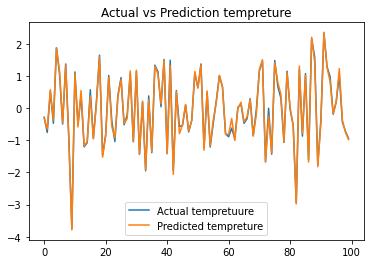

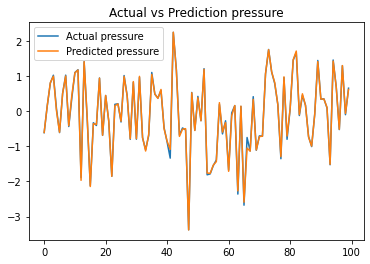

In [183]:
l = prediction_plot_temp_press(model5,X3_test , y3_test)

In [185]:
l[0].head(10)

,pred_temp,pred_pressure,actual_temp,actual_pressure
0,-0.300775,-0.604135,-0.281455,-0.611706
1,-0.652819,0.153210,-0.755624,0.149926
2,0.574415,0.812874,0.522261,0.795762
3,-0.373527,0.995008,-0.469937,1.023774
4,1.876514,0.016409,1.881939,0.071137
5,1.148613,-0.598809,1.060442,-0.609318
6,-0.453037,0.502933,-0.494831,0.504479
7,1.331109,1.000784,1.374579,1.026161
8,-0.918628,-0.412019,-0.881278,-0.436220
9,-3.787200,0.456637,-3.745257,0.379132


In [186]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [201]:


def prediction_plot_temp_press(model,X , y , start = 0 , end = 100):
  prediction = model.predict(X)
  df = pd.DataFrame()
  df['pred_temp'] =  postprocess_temp(prediction[:,0].flatten())
  df['pred_pressure'] = postprocess_p(prediction[:,1].flatten())
  df['actual_temp'] = postprocess_temp(y[:,0])
  df['actual_pressure'] = postprocess_p(y[:,1])
  print(df.head())
  plt.figure()
  plt.plot(df['actual_temp'][start:end],label='Actual tempretuure')
  plt.plot(df['pred_temp'][start:end],label = 'Predicted tempreture')
  plt.title('Actual vs Prediction tempreture')
  plt.legend()

  plt.figure()
  plt.plot(df['actual_pressure'][start:end],label='Actual pressure')
  plt.plot(df['pred_pressure'][start:end],label = 'Predicted pressure')
  plt.title('Actual vs Prediction pressure')
  plt.legend()
  MSE = {}
  MSE['temp mse'] = mean_squared_error(postprocess_temp(y[:,0]),postprocess_temp(prediction[:,0].flatten()))
  MSE['pressure mse'] = mean_squared_error(postprocess_p(y[:,1]),postprocess_p(prediction[:,1].flatten()))
  print("MSE = ",MSE)
  return df ,MSE

MSE =  {'temp mse': 0.5084200795879462, 'pressure mse': 0.08916013437855724}


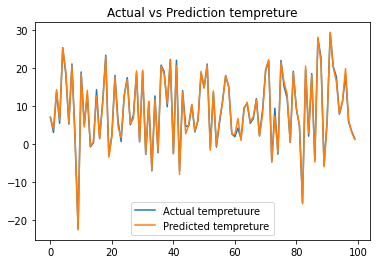

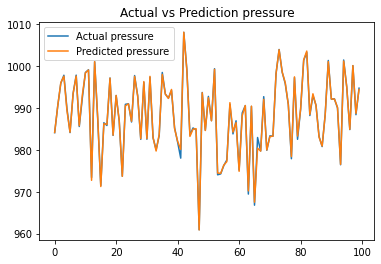

In [190]:
l = prediction_plot_temp_press(model5,X3_test , y3_test)

#Stacking LSTM layers

In [192]:
#less mean square error than single LSTM
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True)) # note that we should make  return_sequence = True since next LSTM layer need sequence not just single element
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 7, 32)             4992      
                                                                 
 lstm_7 (LSTM)               (None, 64)                24832     
                                                                 
 dense_12 (Dense)            (None, 8)                 520       
                                                                 
 dense_13 (Dense)            (None, 2)                 18        
                                                                 
Total params: 30,362
Trainable params: 30,362
Non-trainable params: 0
_________________________________________________________________


In [193]:
cp6 = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/forecaste_datasets/model6/',save_best_only= True) #make check point
model6.compile(loss = MeanSquaredError() , optimizer = Adam(learning_rate=0.0001),metrics = [MeanSquaredError()])
history = model6.fit(X3_train ,y3_train  , validation_data = (X3_val  , y3_val ),epochs = 10 ,callbacks= [cp6])


Epoch 1/10
1748/1752 [============================>.] - ETA: 0s - loss: 0.1472 - mean_squared_error: 0.1472

1752/1752 [==============================] - 38s 19ms/step - loss: 0.1470 - mean_squared_error: 0.1470 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 2/10
1750/1752 [============================>.] - ETA: 0s - loss: 0.0365 - mean_squared_error: 0.0365

1752/1752 [==============================] - 32s 19ms/step - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 3/10
1750/1752 [============================>.] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211

1752/1752 [==============================] - 33s 19ms/step - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0145 - val_mean_squared_error: 0.0144
Epoch 4/10
1748/1752 [============================>.] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122

1752/1752 [==============================] - 32s 18ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 5/10
1749/1752 [============================>.] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092

1752/1752 [==============================] - 32s 18ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 6/10
1749/1752 [============================>.] - ETA: 0s - loss: 0.0076 - mean_squared_error: 0.0076

1752/1752 [==============================] - 32s 18ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 7/10
1752/1752 [==============================] - ETA: 0s - loss: 0.0065 - mean_squared_error: 0.0065

1752/1752 [==============================] - 31s 17ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 8/10
1752/1752 [==============================] - ETA: 0s - loss: 0.0058 - mean_squared_error: 0.0058

1752/1752 [==============================] - 30s 17ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 9/10
1750/1752 [============================>.] - ETA: 0s - loss: 0.0054 - mean_squared_error: 0.0054

1752/1752 [==============================] - 32s 18ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 10/10
1751/1752 [============================>.] - ETA: 0s - loss: 0.0052 - mean_squared_error: 0.0052

1752/1752 [==============================] - 31s 18ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0050 - val_mean_squared_error: 0.0050


In [196]:
loss , mse = model6.evaluate(X3_test,y3_test)


219/219 [==============================] - 1s 4ms/step - loss: 0.0046 - mean_squared_error: 0.0046


   pred_temp  pred_pressure  actual_temp  actual_pressure
0   7.097592     984.069946         7.09           984.07
1   4.088886     990.326416         3.09           990.45
2  14.342183     995.966431        13.87           995.86
3   6.509953     997.465820         5.50           997.77
4  25.282040     989.076477        25.34           989.79
MSE =  {'temp mse': 0.5285145401071648, 'pressure mse': 0.11973487104758931}


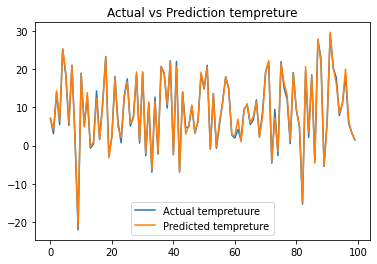

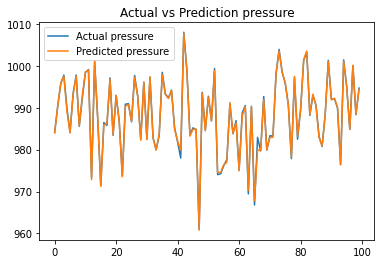

In [202]:
l = prediction_plot_temp_press(model6,X3_test , y3_test)

#Conv1D model

In [203]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 64)             832       
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense_14 (Dense)            (None, 8)                 3080      
                                                                 
 dense_15 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,930
Trainable params: 3,930
Non-trainable params: 0
_________________________________________________________________


In [204]:
cp7 = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/forecaste_datasets/model7/',save_best_only= True) #make check point
model7.compile(loss = MeanSquaredError() , optimizer = Adam(learning_rate=0.0001),metrics = [MeanSquaredError()])
history = model7.fit(X3_train ,y3_train  , validation_data = (X3_val  , y3_val ),epochs = 10 ,callbacks= [cp7])

Epoch 1/10
1752/1752 [==============================] - 6s 3ms/step - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 2/10
1752/1752 [==============================] - 5s 3ms/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 3/10
1752/1752 [==============================] - 5s 3ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 4/10
1752/1752 [==============================] - 6s 3ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 5/10
1752/1752 [==============================] - 6s 3ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 6/10
1752/1752 [==============================] - 8s 5ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0067 - val_mean_squared_error: 0.0066
Epoch 7/10
1752/

In [205]:
loss , mse = model7.evaluate(X3_test,y3_test)

219/219 [==============================] - 0s 2ms/step - loss: 0.0048 - mean_squared_error: 0.0048


   pred_temp  pred_pressure  actual_temp  actual_pressure
0   6.625305     984.265625         7.09           984.07
1   3.858398     990.200439         3.09           990.45
2  13.827929     996.149109        13.87           995.86
3   6.385739     997.469788         5.50           997.77
4  25.349041     989.372131        25.34           989.79
MSE =  {'temp mse': 0.5627878818041991, 'pressure mse': 0.11961497813748566}


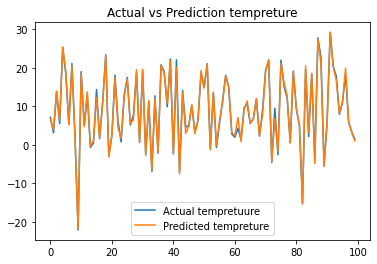

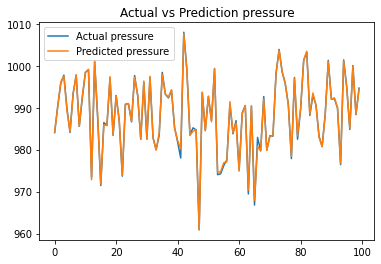

In [206]:
l = prediction_plot_temp_press(model7,X3_test , y3_test)